In [53]:
import pandas as pd


partidos = {}

df = pd.read_csv('w41.csv')
process = {'Party': [],
            'Donee': [],
            'value': []
            }

for row in df.values:
    _, partido, donante, valor, *b = row
    valor = float(valor.replace(',','')[1:])
    process['Party'].append(partido)
    process['Donee'].append(donante)
    process['value'].append(valor)

process_df = pd.DataFrame(process)
process_df.to_csv('processed.csv')


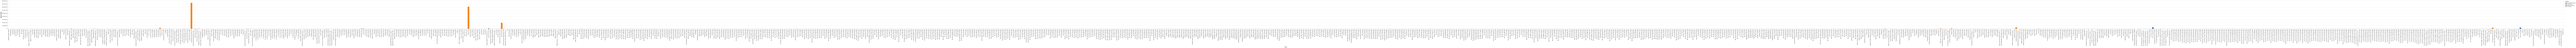

In [52]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.renderers.enable('notebook')


alt.Chart(process_df).mark_bar().encode(
    x='Party',
    y='sum(value)',
    color='Donee'
).transform_window(
    rank='rank(sum(value))',
    sort=[alt.EncodingSortField('sum(value)', order='descending')]
)